In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [3]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
model = Sequential([
    Conv2D(50, kernel_size=3, padding='same', strides=2, activation="relu", input_shape=(32,32,3)),
    Conv2D(100, kernel_size=3, padding='same', strides=2, activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(200, kernel_size=3, padding='same', strides=2, activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(300, kernel_size=3, padding='same', strides=2, activation="relu"),
    Conv2D(500, kernel_size=3, padding='same', strides=2, activation="relu"),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 16, 16, 50)        1400      
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 100)         45100     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 100)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 200)         180200    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 200)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 1, 300)        

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=.001)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
mse = tf.keras.metrics.MeanSquaredError()

model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = [acc, mae, mse]
              )

In [10]:
data = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = data.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [13]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

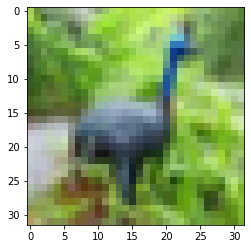

label : bird


In [14]:
plt.imshow(train_images[6])
plt.show()
print(f"label : {labels[train_labels[6][0]]}")

In [15]:
with tf.device("/device:GPU:0"):
  history = model.fit(train_images[...,np.newaxis],train_labels, batch_size= 64, epochs= 50, validation_split=0.1)

Epoch 1/50
704/704 [==============================] - 15s 9ms/step - loss: 1.8656 - sparse_categorical_accuracy: 0.2622 - mean_absolute_error: 4.4148 - mean_squared_error: 27.5703 - val_loss: 1.6886 - val_sparse_categorical_accuracy: 0.3514 - val_mean_absolute_error: 4.4667 - val_mean_squared_error: 28.0739
Epoch 2/50
704/704 [==============================] - 8s 12ms/step - loss: 1.4189 - sparse_categorical_accuracy: 0.4678 - mean_absolute_error: 4.4148 - mean_squared_error: 27.5858 - val_loss: 1.3000 - val_sparse_categorical_accuracy: 0.5270 - val_mean_absolute_error: 4.4667 - val_mean_squared_error: 28.0816
Epoch 3/50
704/704 [==============================] - 7s 10ms/step - loss: 1.2173 - sparse_categorical_accuracy: 0.5561 - mean_absolute_error: 4.4148 - mean_squared_error: 27.5944 - val_loss: 1.1859 - val_sparse_categorical_accuracy: 0.5748 - val_mean_absolute_error: 4.4667 - val_mean_squared_error: 28.0877
Epoch 4/50
704/704 [==============================] - 6s 8ms/step - loss:

In [16]:
df = pd.DataFrame(history.history)

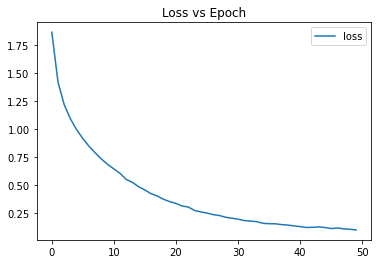

In [17]:
df.plot( y = "loss", title = "Loss vs Epoch")

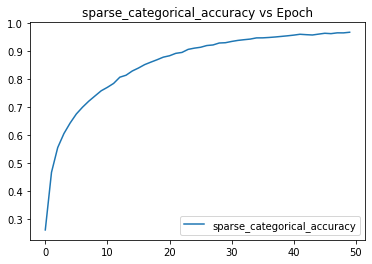

In [18]:
df.plot( y = "sparse_categorical_accuracy", title = "sparse_categorical_accuracy vs Epoch")

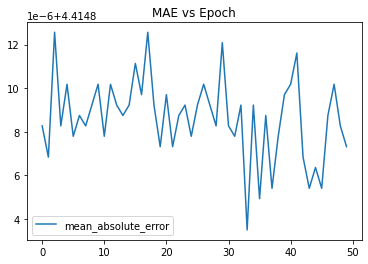

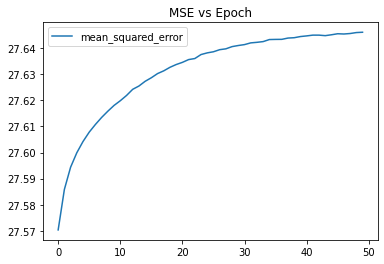

In [19]:
df.plot( y = "mean_absolute_error", title = "MAE vs Epoch")
df.plot(y="mean_squared_error", title="MSE vs Epoch")

In [20]:
loss, accuracy, mae, mse = model.evaluate(test_images[...,np.newaxis], test_labels)
print("loss", loss)
print("acc", accuracy)
print("mae", mae)
print("mse", mse)

313/313 [==============================] - 2s 4ms/step - loss: 2.6042 - sparse_categorical_accuracy: 0.6375 - mean_absolute_error: 4.4200 - mean_squared_error: 27.6884
loss 2.6042280197143555
acc 0.637499988079071
mae 4.4199981689453125
mse 27.68837547302246


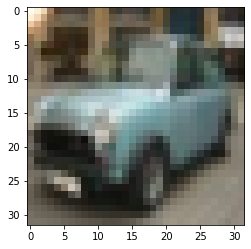

Label: automobile


In [21]:
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx][0]]}")

In [25]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print("Model", labels[np.argmax(pred)])

1/1 [==============================] - 0s 32ms/step
Model automobile


1/1 [==============================] - 0s 15ms/step


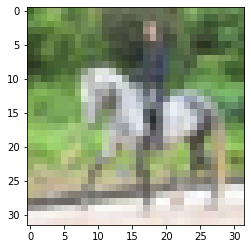

Prediction: horse
1/1 [==============================] - 0s 15ms/step


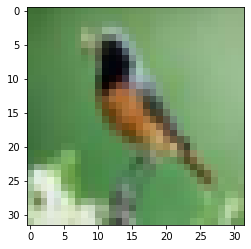

Prediction: bird
1/1 [==============================] - 0s 26ms/step


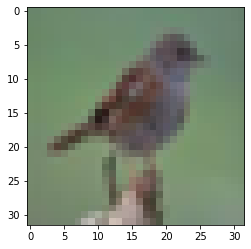

Prediction: bird
1/1 [==============================] - 0s 15ms/step


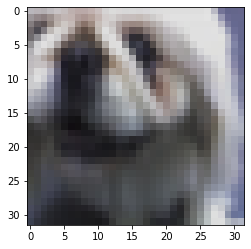

Prediction: dog


In [36]:
def predict(image):
  '''
  Función que recibe una imagen para predecir a qué clase pertenece
  '''
  np_image = image[np.newaxis,...,np.newaxis]
  pred = model.predict(np_image)
  plt.imshow(image)
  plt.show()
  return labels[np.argmax(pred)]

random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]

random_inx2 = np.random.choice(test_images.shape[0])
test_image2 = test_images[random_inx2]

random_inx3 = np.random.choice(test_images.shape[0])
test_image3 = test_images[random_inx3]

random_inx4 = np.random.choice(test_images.shape[0])
test_image4 = test_images[random_inx4]

print('Prediction:', predict(test_image))
print('Prediction:', predict(test_image2))
print('Prediction:', predict(test_image3))
print('Prediction:', predict(test_image4))